<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Обаботка-данных" data-toc-modified-id="Обаботка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обаботка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Определение-дисбаланса-классов" data-toc-modified-id="Определение-дисбаланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение дисбаланса классов</a></span></li><li><span><a href="#F-1-для-разных-моделей" data-toc-modified-id="F-1-для-разных-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>F-1 для разных моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ROC-кривая</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Общая информация

In [1]:
import pandas as pd
import math as mt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

display(df.head(), df.info(), df.describe(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

### Обаботка данных

In [3]:
# заполним пропуске в столбце Tenure медианным значением
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

# удаляем столбцы RowNumber, Surname, CustomerId так как они не несут информации для обучения модели
df = df.drop(columns=['RowNumber', 'Surname', 'CustomerId'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [4]:
# оценка количества дополнительных столбцов при прямом кодировании стоблца Geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
# прямое кодирование столбцов Geography и Gender
df = pd.get_dummies(df, drop_first=True)

In [6]:
features = df.drop(['Exited'], axis=1)
target = df['Exited']

# Выделяем тестовую выбоку - 20% от всех данных
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

# выделяем валидационную выборку из обучающей выборки - 20% от всех данных, но уже из 80% данных
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)

np.bincount(target_train), np.bincount(target_test), np.bincount(target_valid)

(array([4781, 1219]), array([1573,  427]), array([1609,  391]))

In [7]:
features = df.drop(['Exited'], axis=1)
target = df['Exited']

# Выделяем тестовую выбоку - 20% от всех данных
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify=target)

# выделяем валидационную выборку из обучающей выборки - 20% от всех данных, но уже из 80% данных
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345, stratify=target_train)

In [8]:
np.bincount(target_train), np.bincount(target_test), np.bincount(target_valid)

(array([4777, 1223]), array([1593,  407]), array([1593,  407]))

In [9]:
features_train.shape, features_valid.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

In [10]:
# стандартизация количественных данных
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод

- В столбце Tenure пропуски заполнены медианным значением.
- Удалены столбцы 'RowNumber', 'Surname', 'CustomerId', т.к. они не являются признаками для обучения модели.

## Исследование задачи

### Определение дисбаланса классов

<AxesSubplot:>

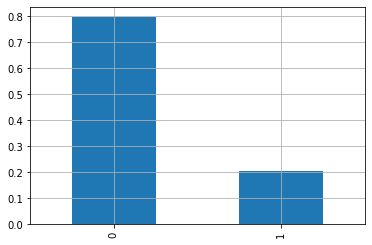

In [11]:
target_train.value_counts(normalize=True).plot(kind='bar', grid=True)

### F-1 для разных моделей

In [12]:
# Дерево решений
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result:
        best_model_tree = model
        best_result = result
        best_depth = depth
        
print("F1 лучшей модели:", best_result)
print("Max_depth:", best_depth)

F1 лучшей модели: 0.5816618911174785
Max_depth: 8


In [13]:
# Случайный лес
best_result = 0
best_est = 0
best_depth = 0
for est in range(30, 100):
    for depth in range(10, 20):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_est = est
            best_depth = depth
        
print("F1 лучшей модели:", best_result)
print("n_estimators:", best_est)
print('max_depth:', best_depth)

F1 лучшей модели: 0.5869894099848714
n_estimators: 37
max_depth: 15


In [14]:
# Логистическая регрессия
model= LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)

print("F1 логистической регрессии на валидационной выборке:", result)

F1 логистической регрессии на валидационной выборке: 0.3214953271028037


### Вывод

- Определён дисбаланс классов для обучающей выборки: 1:4
- Максимальное значение F1 метрики, при дисбалансе классов, показала модель RandomForestClassifier(random_state=12345, max_depth=15, n_estimators=37). Значение F1: 0.587

## Борьба с дисбалансом

### Взвешивание классов

In [15]:
# Дерево решений
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') 
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result:
        best_model_tree = model
        best_result = result
        best_depth = depth
        
print("F1 лучшей модели:", best_result)
print("Max_depth:", best_depth)

F1 лучшей модели: 0.5747330960854092
Max_depth: 6


In [16]:
# Случайный лес
best_result = 0
best_est = 0
best_depth = 0
for est in range(30, 100):
    for depth in range(10, 20):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_est = est
            best_depth = depth
        
print("F1 лучшей модели:", best_result)
print("n_estimators:", best_est)
print('max_depth:', best_depth)

F1 лучшей модели: 0.6439024390243903
n_estimators: 60
max_depth: 10


In [17]:
# Логистическая регрессия
model= LogisticRegression(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)

print("F1 логистической регрессии на валидационной выборке:", result)

F1 логистической регрессии на валидационной выборке: 0.5113043478260869


### Upsampling

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [19]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts(normalize=True)

1    0.505947
0    0.494053
Name: Exited, dtype: float64

In [20]:
# Дерево решений
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result:
        best_model_tree = model
        best_result = result
        best_depth = depth
        
print("F1 лучшей модели:", best_result)
print("Max_depth:", best_depth)

F1 лучшей модели: 0.576544315129812
Max_depth: 6


In [21]:
# Случайный лес
best_result = 0
best_est = 0
best_depth = 0
for est in range(30, 110):
    for depth in range(10, 20):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_est = est
            best_depth = depth
        
print("F1 лучшей модели:", best_result)
print("n_estimators:", best_est)
print('max_depth:', best_depth)

F1 лучшей модели: 0.6420824295010845
n_estimators: 99
max_depth: 10


In [22]:
# Логистическая регрессия
model= LogisticRegression(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)

print("F1 логистической регрессии на валидационной выборке:", result)

F1 логистической регрессии на валидационной выборке: 0.5072836332476435


### ROC-кривая

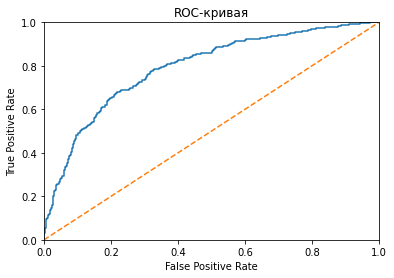

In [23]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds =  roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [24]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.791881249508368

### Вывод

- Были исследованы методы борьбы с дисбалансом: взвешивание классов, upsampling, downsampling, пороговое значение.
- При увеличении выборки upsampling достигнуто максимальное значение f1: 0.642.
- Отимальное соотношение TPR и FPR даёт площадь AUC-ROC 0,84.

## Тестирование модели

In [25]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

features_upsampled, target_upsampled = upsample(features_full_train, target_full_train, 4)

In [26]:
%%time

model = RandomForestClassifier(random_state=12345,  max_depth=10, n_estimators=99)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test)

f1_score(target_test, predictions)

CPU times: user 940 ms, sys: 16 µs, total: 940 ms
Wall time: 960 ms


0.6343042071197411

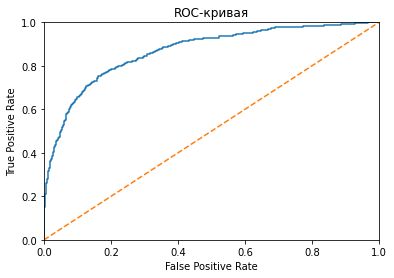

In [27]:
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds =  roc_curve(target_test, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [28]:
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
auc_roc

0.8682056478666648

## Общий вывод

- Была определена наиболее подходящая модель и определены её оптимальные гиперпараметры: RandomForestClassifier(random_state=12345,  max_depth=10, n_estimators=99)

- Максимальное значение F1 на тестовой выборке: 0.634; AUC-ROC - 0.86.